# Linear_Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
learning_rate = 0.001
training_epoch = 1000
show_step = 50

In [3]:
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([1], stddev = 0.1))
b = tf.Variable(tf.truncated_normal([1], stddev = 0.1))

In [5]:
y_pred = X * W + b

In [6]:
cost = tf.reduce_sum(tf.pow(Y - y_pred, 2)) / (2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.initialize_all_variables()

Epoch:   50, cost = 0.191189587, W:  0.324944, b: -0.104005083
Epoch:  100, cost = 0.126731440, W:  0.371326, b: -0.091923617
Epoch:  150, cost = 0.125375524, W:  0.375475, b: -0.085838422
Epoch:  200, cost = 0.124774709, W:  0.375231, b: -0.080406740
Epoch:  250, cost = 0.124195732, W:  0.374533, b: -0.075072095
Epoch:  300, cost = 0.123624623, W:  0.373793, b: -0.069776416
Epoch:  350, cost = 0.123060435, W:  0.373053, b: -0.064513437
Epoch:  400, cost = 0.122503087, W:  0.372316, b: -0.059282571
Epoch:  450, cost = 0.121952504, W:  0.371584, b: -0.054083258
Epoch:  500, cost = 0.121408522, W:  0.370856, b: -0.048915427
Epoch:  550, cost = 0.120871149, W:  0.370132, b: -0.043778982
Epoch:  600, cost = 0.120340221, W:  0.369414, b: -0.038673528
Epoch:  650, cost = 0.119815759, W:  0.368699, b: -0.033599097
Epoch:  700, cost = 0.119297586, W:  0.367988, b: -0.028555294
Epoch:  750, cost = 0.118785702, W:  0.367282, b: -0.023542169
Epoch:  800, cost = 0.118279994, W:  0.366580, b: -0.01

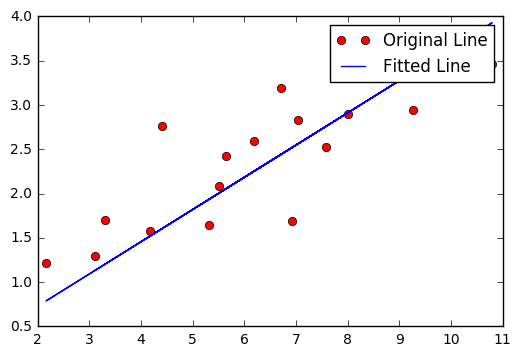

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_epoch):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (i + 1) % show_step == 0:
            cur_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch: %4d, cost = %.9f, W: %9f, b: %.9f" %(i+1, cur_cost, sess.run(W), sess.run(b))
            
    print "Optimizer Finished"
    tr_cost = sess.run(cost, feed_dict={X: x, Y: y})
    print "cost = %9f, W: %.9f, b: %.9f" %(tr_cost, sess.run(W), sess.run(b))
    
    plt.plot(train_X, train_Y, "ro", label = "Original Line")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = "Fitted Line")
    plt.legend()
    plt.show()